## Imports

In [1]:
# !pip install fastai
# !pip install opencv-python

#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.all import *
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.vision.all import *

### Load Data https://doi.org/10.48550/arXiv.1912.12142

In [6]:
x = "C:/Users/Cynth/Desktop/lung_colon_image_set"
path = Path(x)
path.ls()

(#5) [Path('C:/Users/Cynth/Desktop/lung_colon_image_set/colon_aca'),Path('C:/Users/Cynth/Desktop/lung_colon_image_set/colon_n'),Path('C:/Users/Cynth/Desktop/lung_colon_image_set/lung_aca'),Path('C:/Users/Cynth/Desktop/lung_colon_image_set/lung_n'),Path('C:/Users/Cynth/Desktop/lung_colon_image_set/lung_scc')]

# Create Dataloader

##### Randomly divide the images into 20% validation set and 80% training data
##### Rezsizing images to 460x460 pixels and cropping to 224x224 pixels
##### Data augmentation & normalization 
##### 4 CPU cores to speed up loading and pre-processing of images

In [8]:
np.random.seed(40)
data = ImageDataLoaders.from_folder(path, train='.', valid_pct=0.2, 
                                    item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)],
                                    num_workers=4)

### Show Data

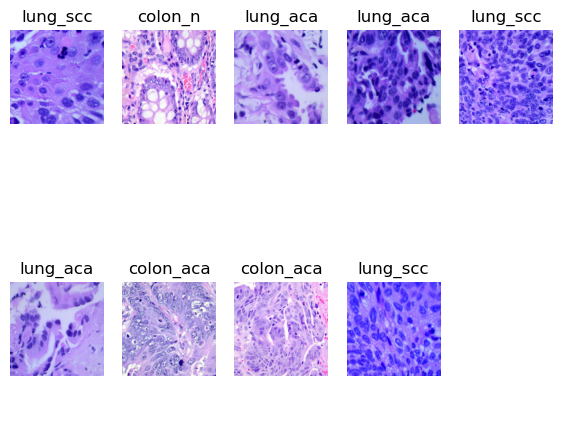

In [19]:
data.show_batch(nrows=2, figsize=(7,6)) # size of images (width = 7 inches, height = 6 inches)

## Show number of classes

In [13]:
data.c

5

## Create Model 

##### creating a neural network learn based on restnet18 

In [22]:
learn = vision_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path(x),path = Path("."))

### Show all classes

In [28]:
# Show all classes
classes = [path.parent.name for path in data.train_ds.items]
print(set(classes))  # set entfernt doppelte Werte

{'colon_n', 'lung_n', 'lung_aca', 'colon_aca', 'lung_scc'}


### Train Model

###### Learning Rate between 0.001 and 0.1

In [30]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.124739,0.048198,0.982600,1:44:57
1,0.123120,0.091183,0.977800,1:36:30
2,0.169798,0.049323,0.984200,1:24:34
3,0.126295,0.027139,0.992400,59:03
4,0.237834,0.066698,0.986400,57:21
5,0.398574,0.299430,0.975200,57:27
6,0.922231,0.976009,0.984400,57:21
7,0.770393,0.345953,0.976800,57:28
8,0.802216,0.352610,0.986200,1:07:13
9,0.721214,0.929601,0.970200,57:24


### Hyper Parameter Tuning

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.034059,0.004140,0.999000,1:09:15
1,0.158924,0.061759,0.993800,1:12:23
2,0.379699,0.044070,0.994800,1:12:28
3,0.143479,0.030246,0.997000,1:12:00
4,0.227141,0.461002,0.993000,1:12:27
5,0.259161,0.237138,0.976000,1:12:20
6,0.169539,0.226711,0.969400,1:13:59
7,0.096859,0.012916,0.996200,1:12:33
8,0.060754,0.009532,0.997800,1:10:17
9,0.062958,0.027867,0.993000,1:09:18


### Plotting Course of training and validation loss across training epochs

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

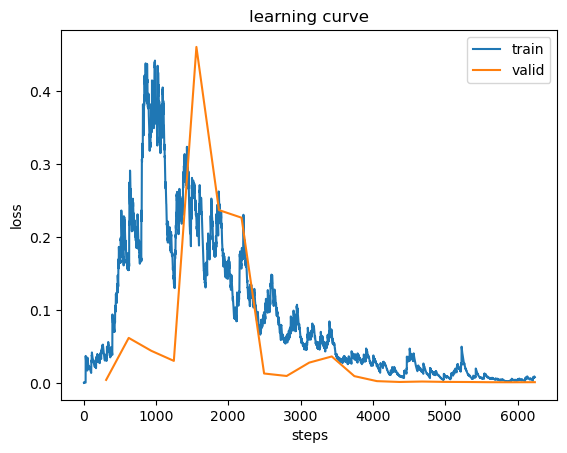

In [35]:
learn.recorder.plot_loss()

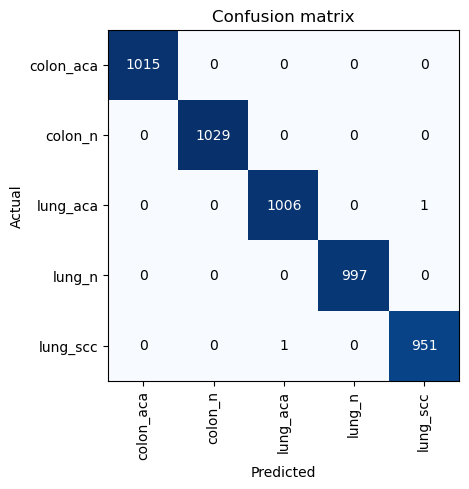

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [41]:
# learn.export(fname="C:/Users/Cynth/Desktop/Bachelorarbeit/export.pkl")

### Plot top losses

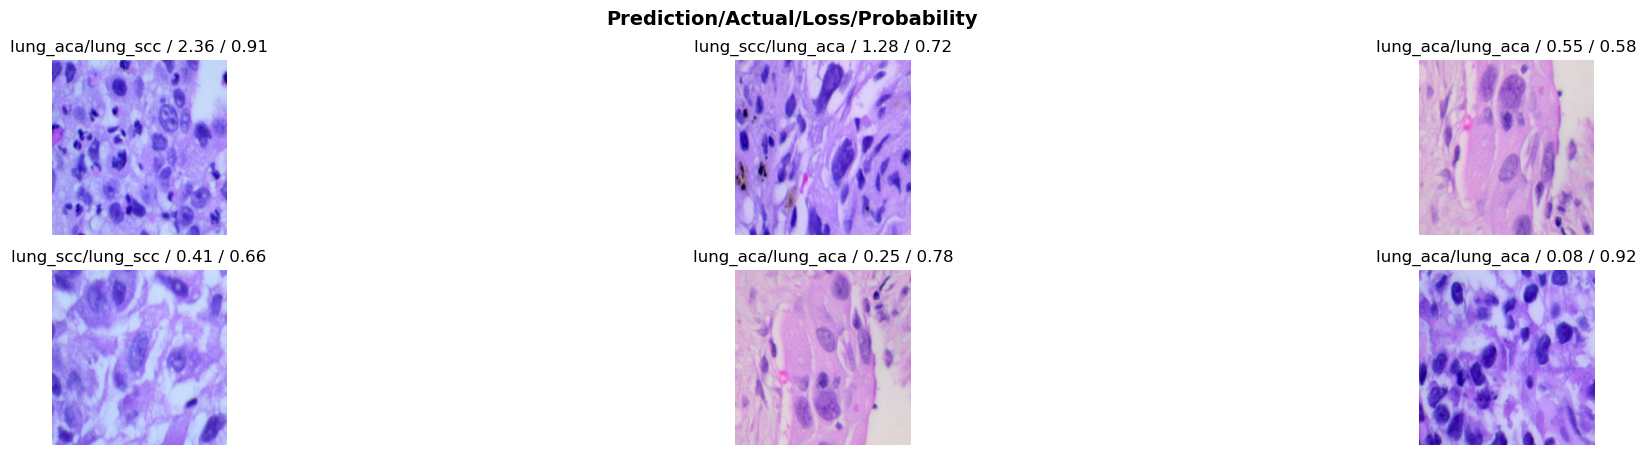

In [43]:
interp.plot_top_losses(6,figsize = (25,5))